<a href="https://colab.research.google.com/github/shashwatsingh6325/TraffiCop.AI/blob/main/helmet_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 35.7/112.6 GB disk)


In [ ]:
!pip install roboflow
from google.colab import userdata
from roboflow import Roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ytelxu6ci6ZHQYERianx")
project = rf.workspace("sign-language-hmfr8").project("helmet_detection-pypw1")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to helmet_detection-1 in yolov11:: 100%|██████████| 217/217 [00:00<00:00, 1859.32it/s]


In [ ]:
!yolo task=detect mode=train model=yolo11s.pt data=/content/helmet_detection-1/data.yaml epochs=60 imgsz=640 plots=True

100% 18.4M/18.4M [00:00<00:00, 212MB/s]
New https://pypi.org/project/ultralytics/8.3.81 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/helmet_detection-1/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retin

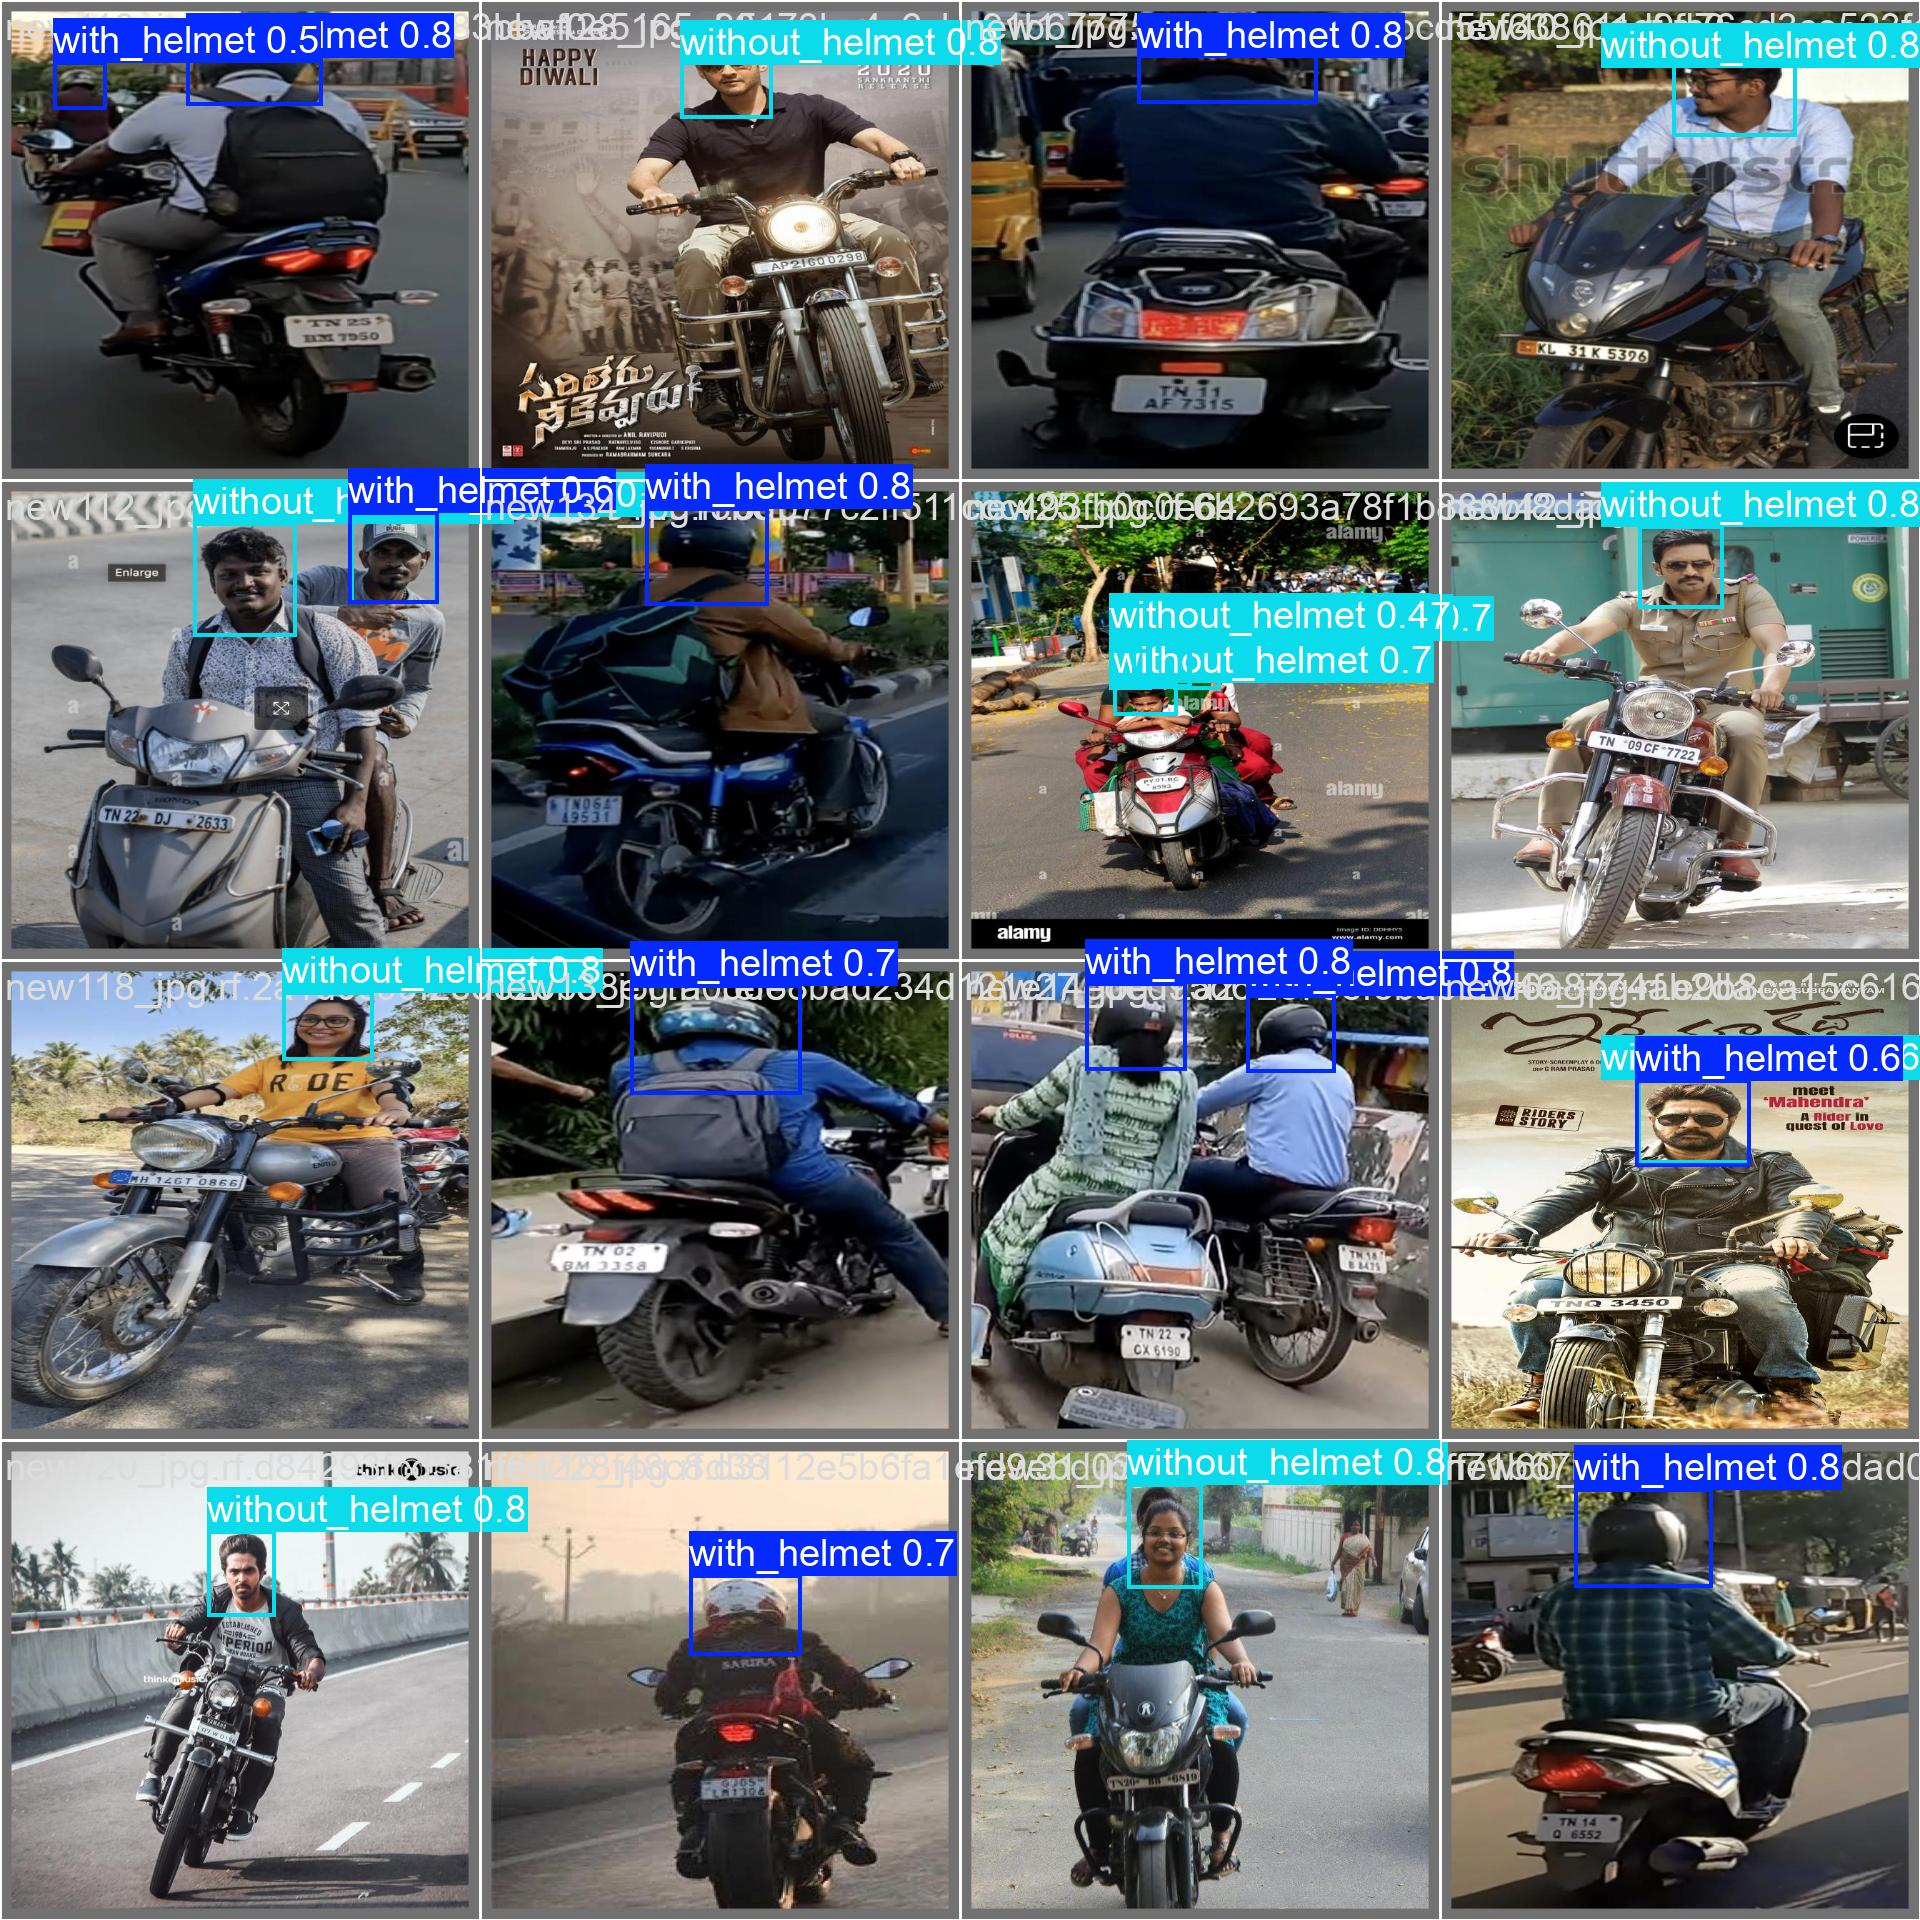

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename='/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/helmet_detection-1/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/helmet_detection-1/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:00<00:00,  2.12it/s]
                   all         21         27      0.873      0.969      0.943      0.507
           with_helmet          9         11      0.843          1      0.981      0.568
        without_helmet         12         16      0.904      0.938      0.905      0.446
Speed: 0.3ms preprocess, 23.9ms inference, 0.0ms loss, 7.6ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [52]:
!yolo task=detect mode=predict model=/content/best.pt conf=0.25 source=/content/man6.jpg save=True

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

image 1/1 /content/man6.jpg: 480x640 1 without_helmet, 47.2ms
Speed: 2.8ms preprocess, 47.2ms inference, 151.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


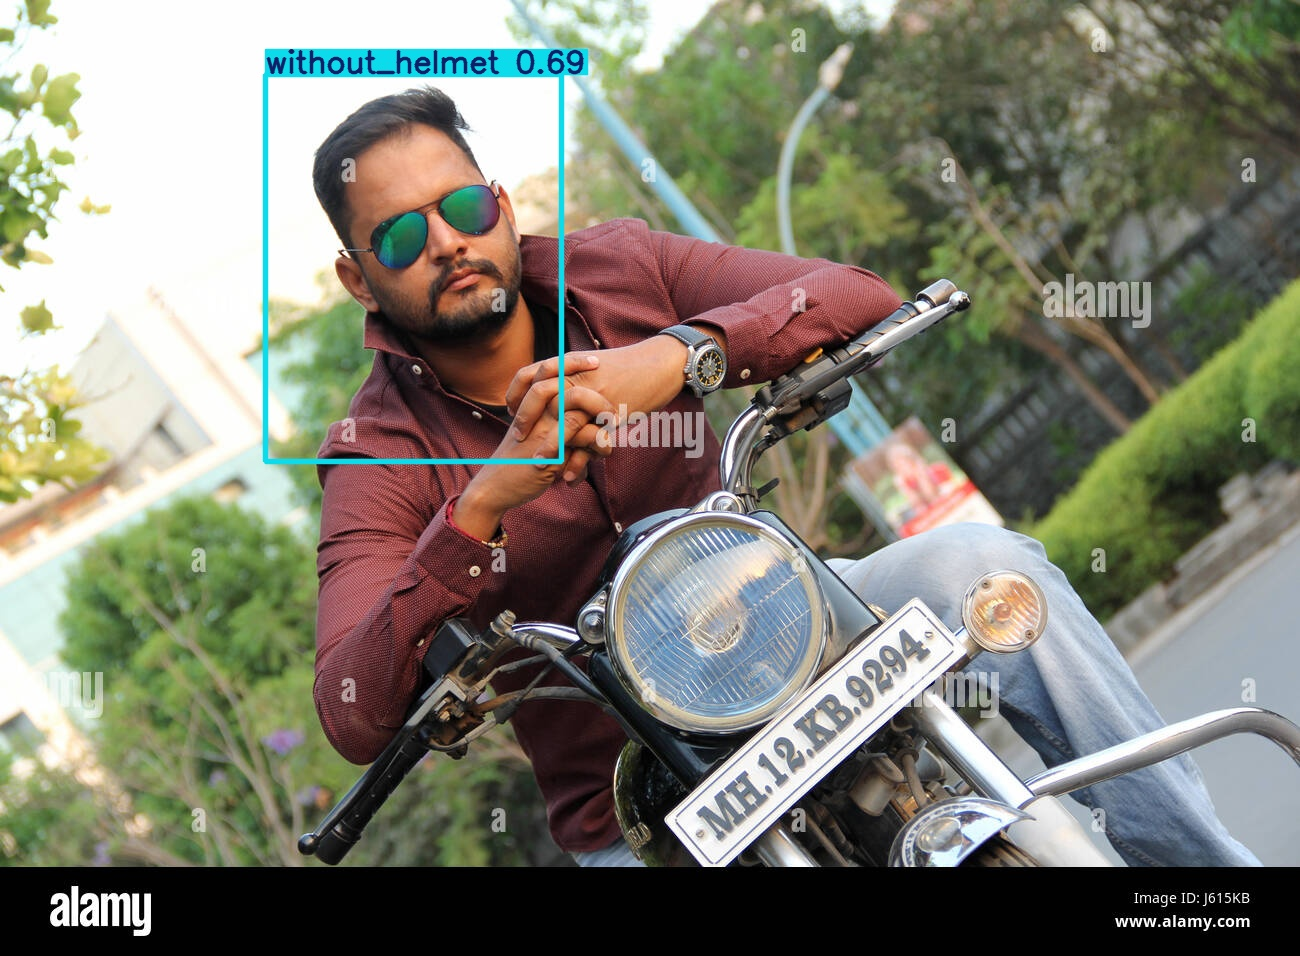

In [53]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [14]:
%pip install easyocr
%pip install imutils
%pip install opencv-python
%pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 25.2 MB/s eta 0:00:00


In [15]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils
import random


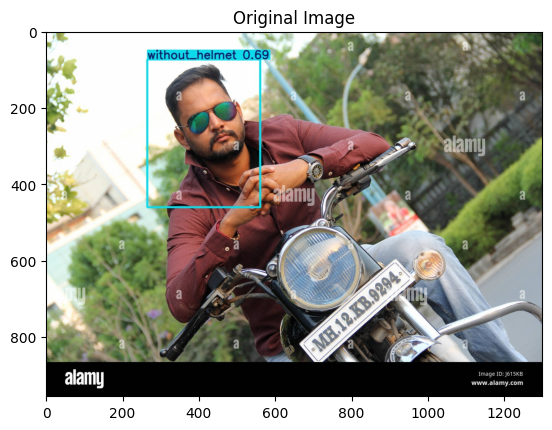

Text(0.5, 1.0, 'Processed Image')

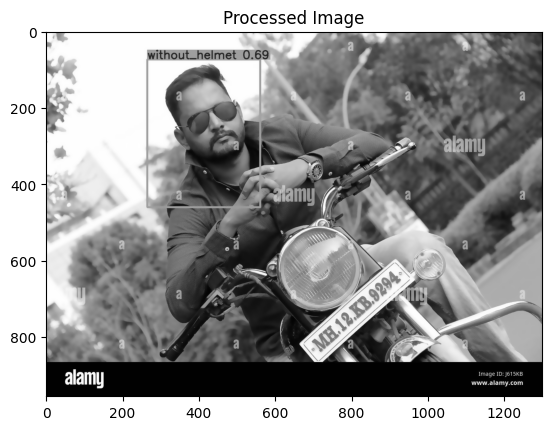

In [54]:
image_path = "/content/runs/detect/predict5/man6.jpg"  # Example for macOS
img = cv2.imread(image_path)  # Read the image

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert image to gray
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB)) #show processed image
plt.title('Processed Image')


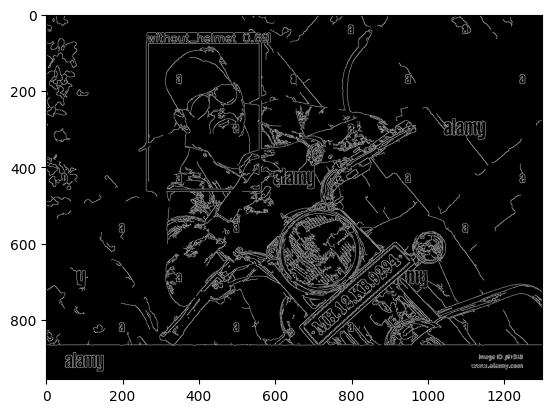

In [55]:
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


In [59]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #Find contours
contours = imutils.grab_contours(keypoints) #Grab contours
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #Sort contours
#Loop over our contours to find the best possible approximate contour of 10 contours
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

print("Location: ", location)



Location:  None


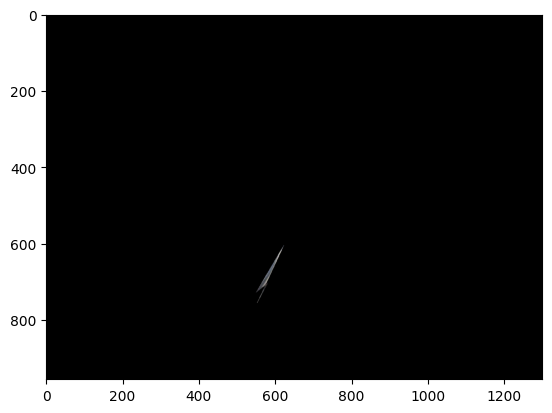

In [51]:
mask = np.zeros(gray.shape, np.uint8) #create blank image with same dimensions as the original image
new_image = cv2.drawContours(mask, [location], 0,255, -1) #Draw contours on the mask image
new_image = cv2.bitwise_and(img, img, mask=mask) #Take bitwise AND between the original image and mask image

plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)) #show the final image


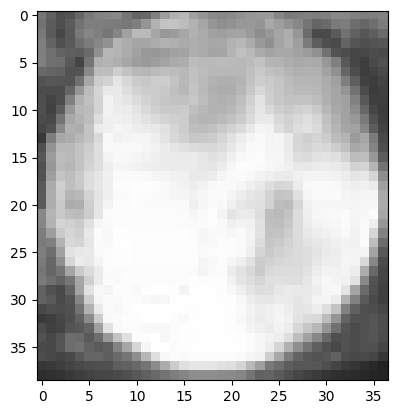

In [22]:
(x,y) = np.where(mask==255) #Find the co-ordinates of the four corners of the document
(x1, y1) = (np.min(x), np.min(y)) #Find the top left corner
(x2, y2) = (np.max(x), np.max(y)) #Find the bottom right corner
cropped_image = gray[x1:x2+1, y1:y2+1] #Crop the image using the co-ordinates

plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)) #show the cropped image


In [23]:
reader = easyocr.Reader(['en']) #create an easyocr reader object with english as the language
result = reader.readtext(cropped_image) #read text from the cropped image
result


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[]

In [24]:
text = result[0][-2] #Extract the text from the result
font = cv2.FONT_HERSHEY_SIMPLEX #Font style
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA) #put the text on the image
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3) #Draw a rectangle around the text

plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB)) #show the final image with text


IndexError: list index out of range